## KMeans Clustering - S2_10_16D_STK_1

This document presents an example of spectral clustering in the Sentinel-2 collection V1 (S2_10_16D_STK_1) of the BDC.

> This simple example aims to present how to clustering the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/stac/).

In [1]:
import datacube
import numpy as np
import matplotlib.pyplot as plt

from utils.data_cube_utilities.dc_display_map import display_map

> Load the **data cube index**. This allow search indexed products

In [2]:
dc = datacube.Datacube(app='datacube')

In [3]:
PRODUCT_NAME = "S2_10_16D_STK_1"

**Using S2_10_16D_STK v1 products**

To begin with, the area of study is defined. The area selected for this example is in the state of Roraima, in Brazil. The map below shows the region

In [4]:
longitude = (-61.6553, -60.4935)
latitude = (1.9744, 2.6907)

In [5]:
display_map(latitude, longitude)

With the region defined, the cube will now be loaded from a scene of the data cube in this region.

> The bands **Band 4** (Red), **Band 3** (Green) and **Band 2** (Blue), were selected so that the visualization of the region can be done.


In [6]:
s2_10_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['band4', 'band3', 'band2', "NDVI", "EVI"], 
                                            longitude = longitude, latitude = latitude,
                                            time = "2019-08-28",
                                            resolution = (10, -10), limit = 1)
s2_10_16d_ftile

<xarray.Dataset>
Dimensions:  (time: 1, x: 13317, y: 8129)
Coordinates:
  * time     (time) datetime64[ns] 2019-08-20T12:00:00
  * y        (y) float64 1.154e+07 1.154e+07 1.154e+07 ... 1.162e+07 1.162e+07
  * x        (x) float64 4.268e+06 4.268e+06 4.267e+06 ... 4.134e+06 4.134e+06
Data variables:
    band4    (time, y, x) int16 271 265 260 253 258 ... 4893 4916 4831 4805 4881
    band3    (time, y, x) int16 431 420 412 404 417 ... 4581 4666 4571 4389 4249
    band2    (time, y, x) int16 247 242 236 233 249 ... 4086 4156 4059 3794 3561
    NDVI     (time, y, x) int16 8336 8342 8375 8419 8415 ... 1244 1500 1678 1764
    EVI      (time, y, x) int16 5321 5247 5263 5298 5402 ... 2385 2828 2831 2674
Attributes:
    crs:      +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=50000...

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [7]:
s2_10_16d_stile = s2_10_16d_ftile.isel(x = slice(0, 3000), y = slice(3000, 6000))
s2_10_16d_stile

<xarray.Dataset>
Dimensions:  (time: 1, x: 3000, y: 3000)
Coordinates:
  * time     (time) datetime64[ns] 2019-08-20T12:00:00
  * y        (y) float64 1.157e+07 1.157e+07 1.157e+07 ... 1.16e+07 1.16e+07
  * x        (x) float64 4.268e+06 4.268e+06 4.267e+06 ... 4.238e+06 4.238e+06
Data variables:
    band4    (time, y, x) int16 363 376 382 378 382 366 ... 359 354 328 311 299
    band3    (time, y, x) int16 617 624 648 671 679 680 ... 630 597 581 533 497
    band2    (time, y, x) int16 320 317 304 309 318 311 ... 287 285 273 248 231
    NDVI     (time, y, x) int16 8336 8295 8281 8303 8270 ... 8378 8475 8547 8597
    EVI      (time, y, x) int16 6600 6574 6538 6595 6551 ... 6532 6560 6545 6535
Attributes:
    crs:      +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=50000...

Viewing the selected region

In [8]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

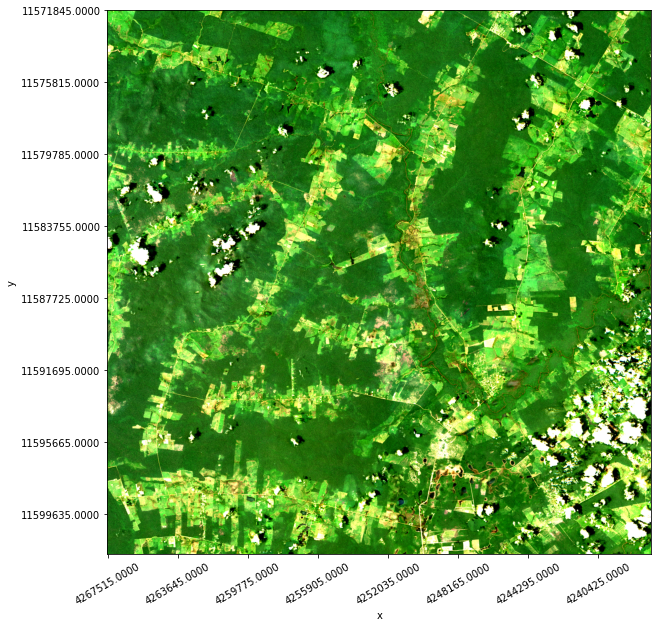

In [9]:
rgb(s2_10_16d_stile.isel(time = 0), bands = ["band4", "band3", "band2"], x_coord = 'x', y_coord = 'y')

## Clustering with KMeans

In this section, the clustering using KMeans is performed

In [10]:
from sklearn.cluster import KMeans
from utils.data_cube_utilities.dc_clustering import clustering_pre_processing

Below is the definition of the bands and the preparation of the data for clustering

In [11]:
bands = ["NDVI", "EVI"]

In [12]:
s2_10_16d_stilec = s2_10_16d_stile.copy()
s2_10_16d_stilec_rgb = s2_10_16d_stilec[bands]

s2_10_16d_stilec_rgb = s2_10_16d_stilec_rgb.isel(time = 0)

Clustering!

In [13]:
features = clustering_pre_processing(s2_10_16d_stilec_rgb, bands)

In [14]:
kmodel = KMeans(3).fit(features[0])

Setting the output to display

In [15]:
shape = s2_10_16d_stilec_rgb[bands[0]].values.shape

classification = np.full(shape, -1)
classification = kmodel.labels_

Viewing the result

In [16]:
res = classification.reshape((3000, 3000))

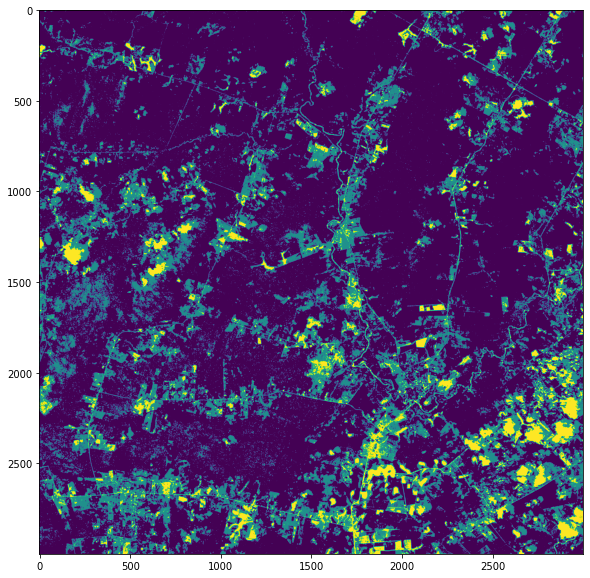

In [17]:
plt.figure(figsize = (10, 10))
plt.imshow(res)